In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [2]:
from mle_toolbox import load_result_logs
from mle_toolbox.utils import load_meta_log


import os
import sys

sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from utils.visualize import plot_roi_subject_grid, plot_average_scores, plot_bo_scores

In [88]:
filename = "/Users/rtl/Dropbox/coding/2021/06_algonauts/experiments/21-06-02_b_1_eval_93_seed_0.hdf5"

import h5py

with h5py.File(filename, "r") as f:
    # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]
    # Get the data
    data = list(f[a_group_key + "/stats/best_bo_score"])
    print(len(data))

Keys: <KeysViewHDF5 ['seed_0']>
68


In [68]:
meta_log = load_meta_log("../experiments/mlp_vgg_bo_30/meta_log.hdf5")
meta_log

In [71]:
df = {"subject_id": [], "roi_type": [], "layer_id": [], "best_bo_score": []}
num_layers = 8
num_bo_per_layer = 20 
for e_t in range(len(hyper_log)):
    run_id = hyper_log.hyper_log.iloc[e_t].run_id
    subject_id = hyper_log.hyper_log.iloc[e_t].subject_id
    roi_type = hyper_log.hyper_log.iloc[e_t].roi_type
    results = meta_log[run_id].stats.best_bo_score.mean
    for i in range(num_layers):
        sub_layer_results = results[i*num_bo_per_layer: num_bo_per_layer + i*num_bo_per_layer]
        best_score_on_layer = np.max(sub_layer_results)
        df["subject_id"].append(subject_id)
        df["roi_type"].append(roi_type)
        df["layer_id"].append("layer_"+str(i+1))
        df["best_bo_score"].append(best_score_on_layer)

import pandas as pd
layer_df = pd.DataFrame(df)

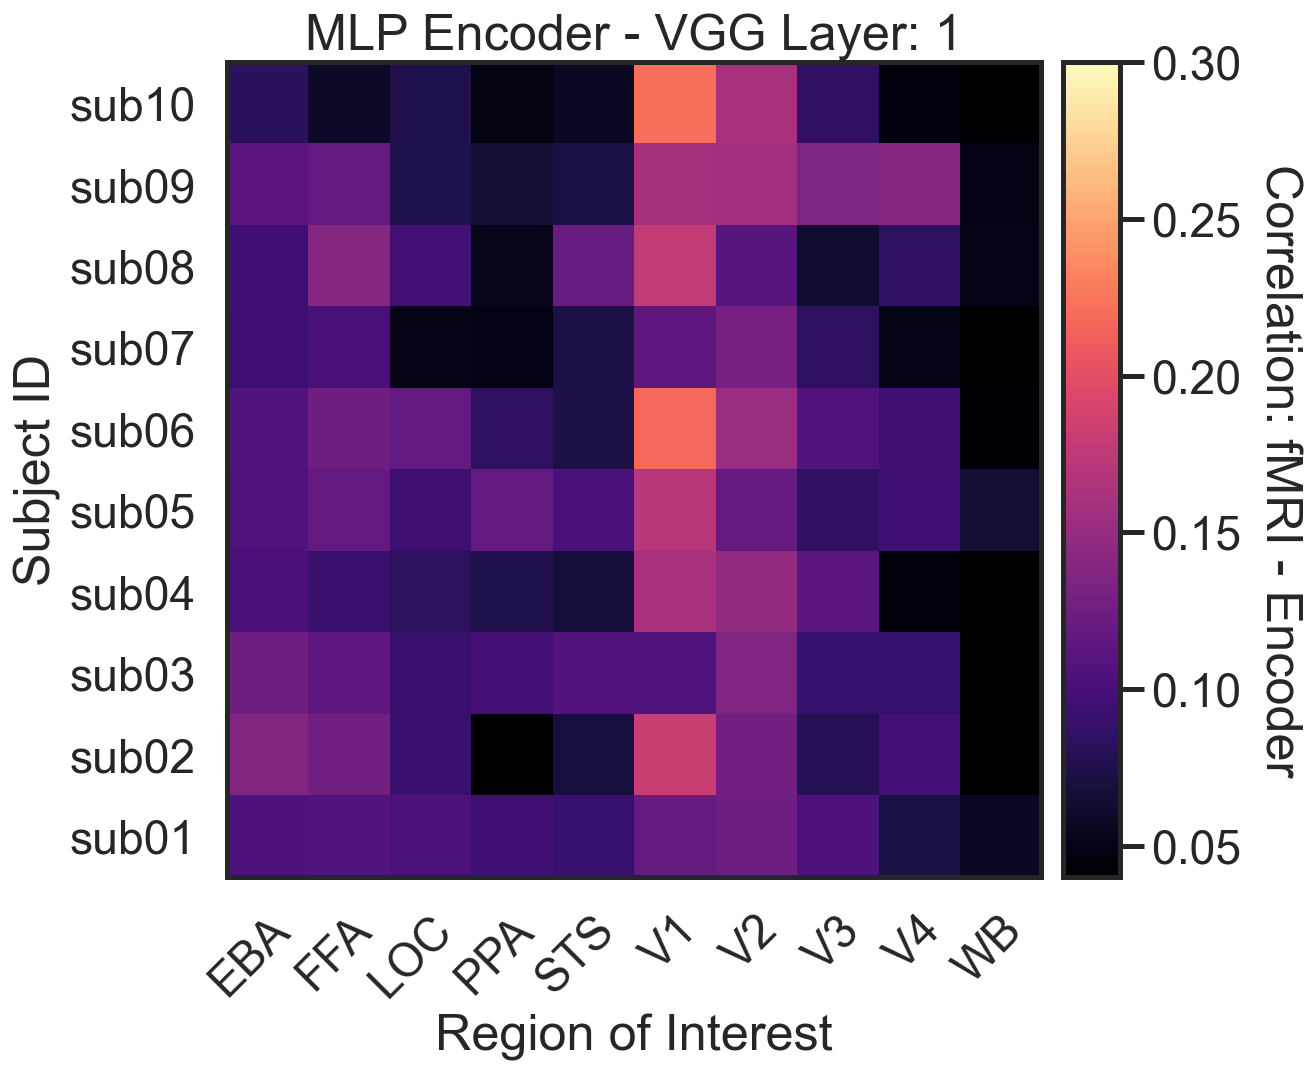

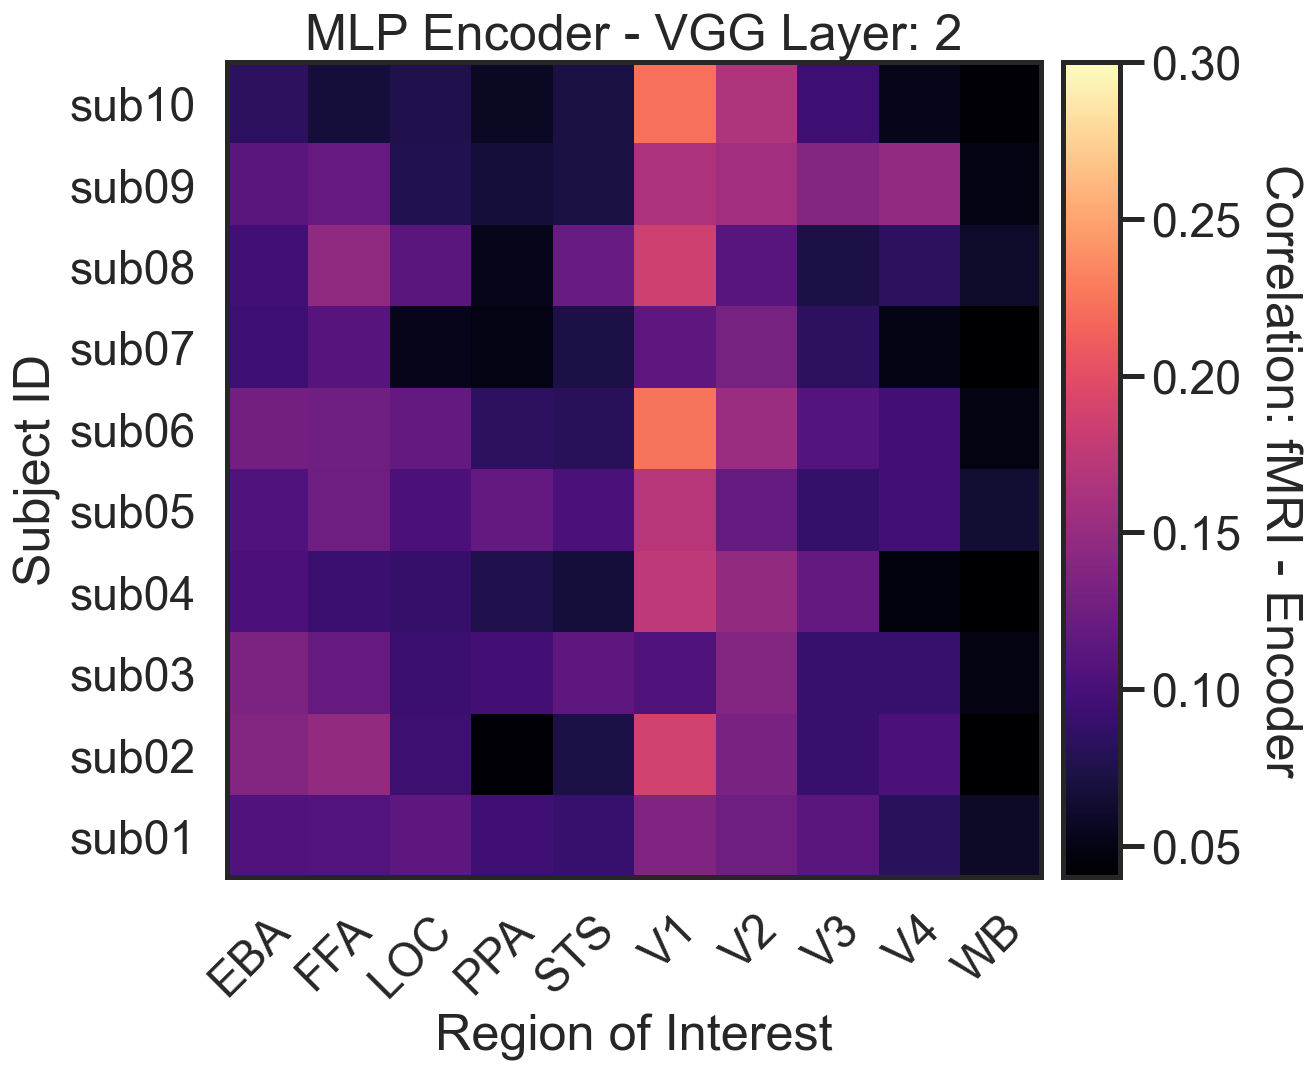

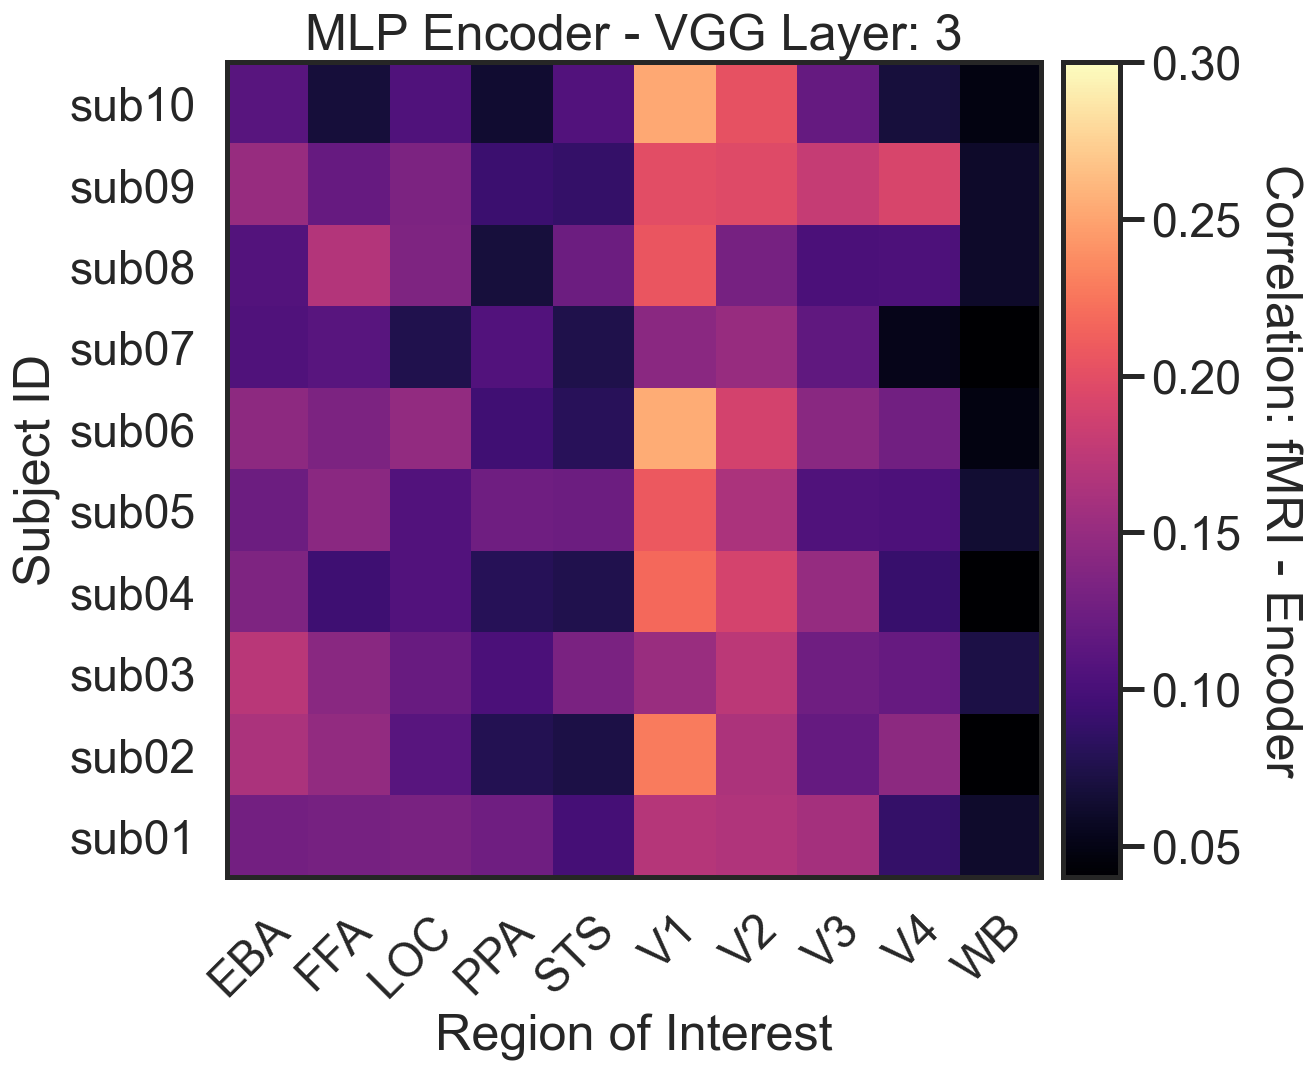

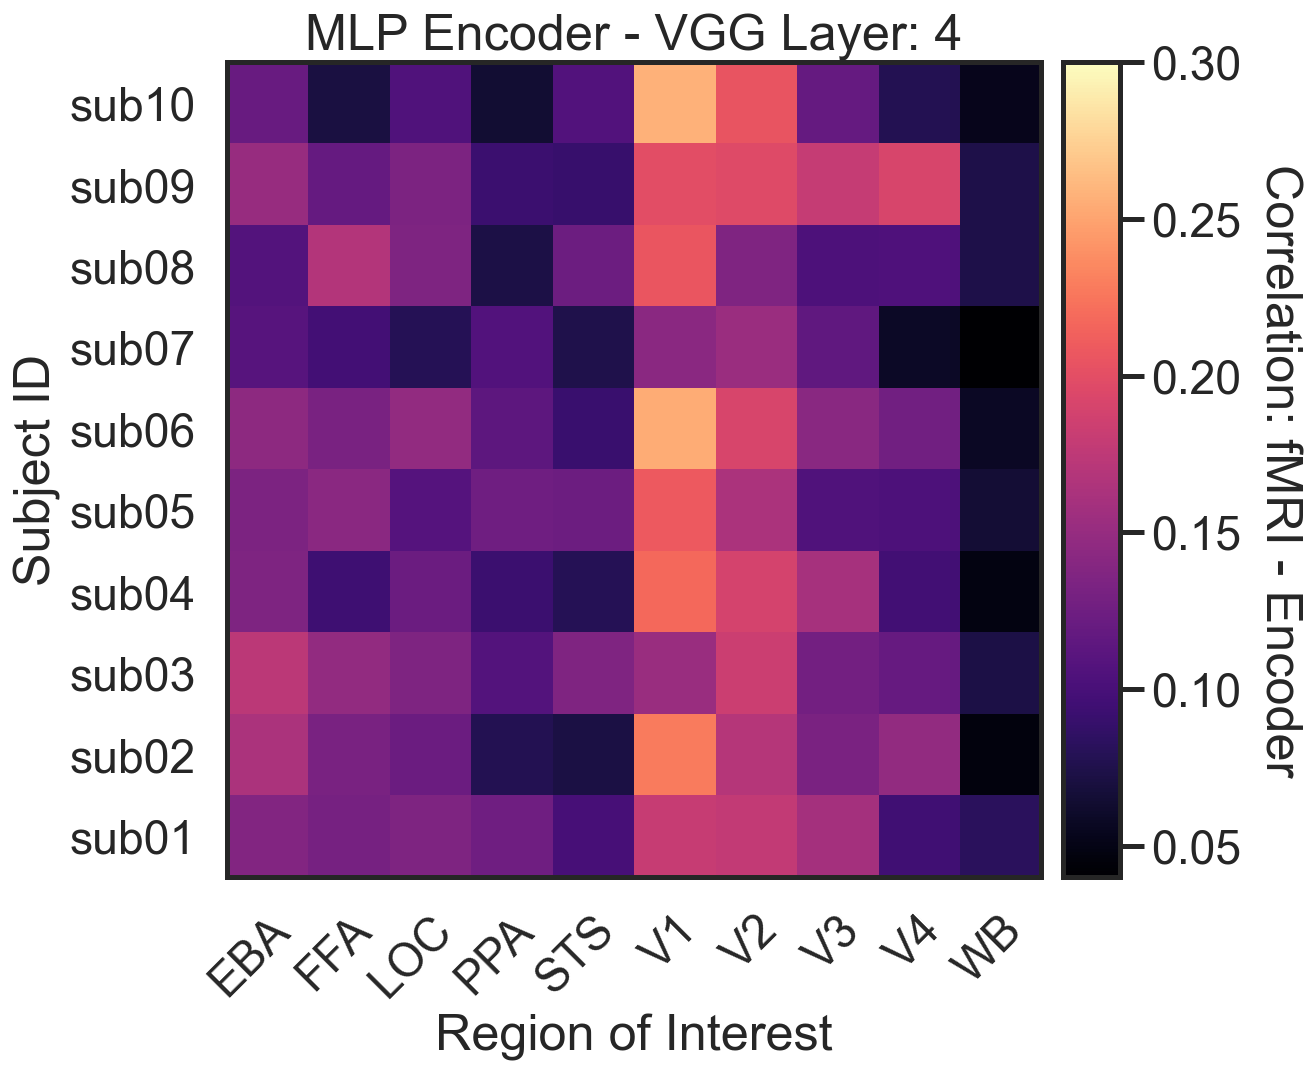

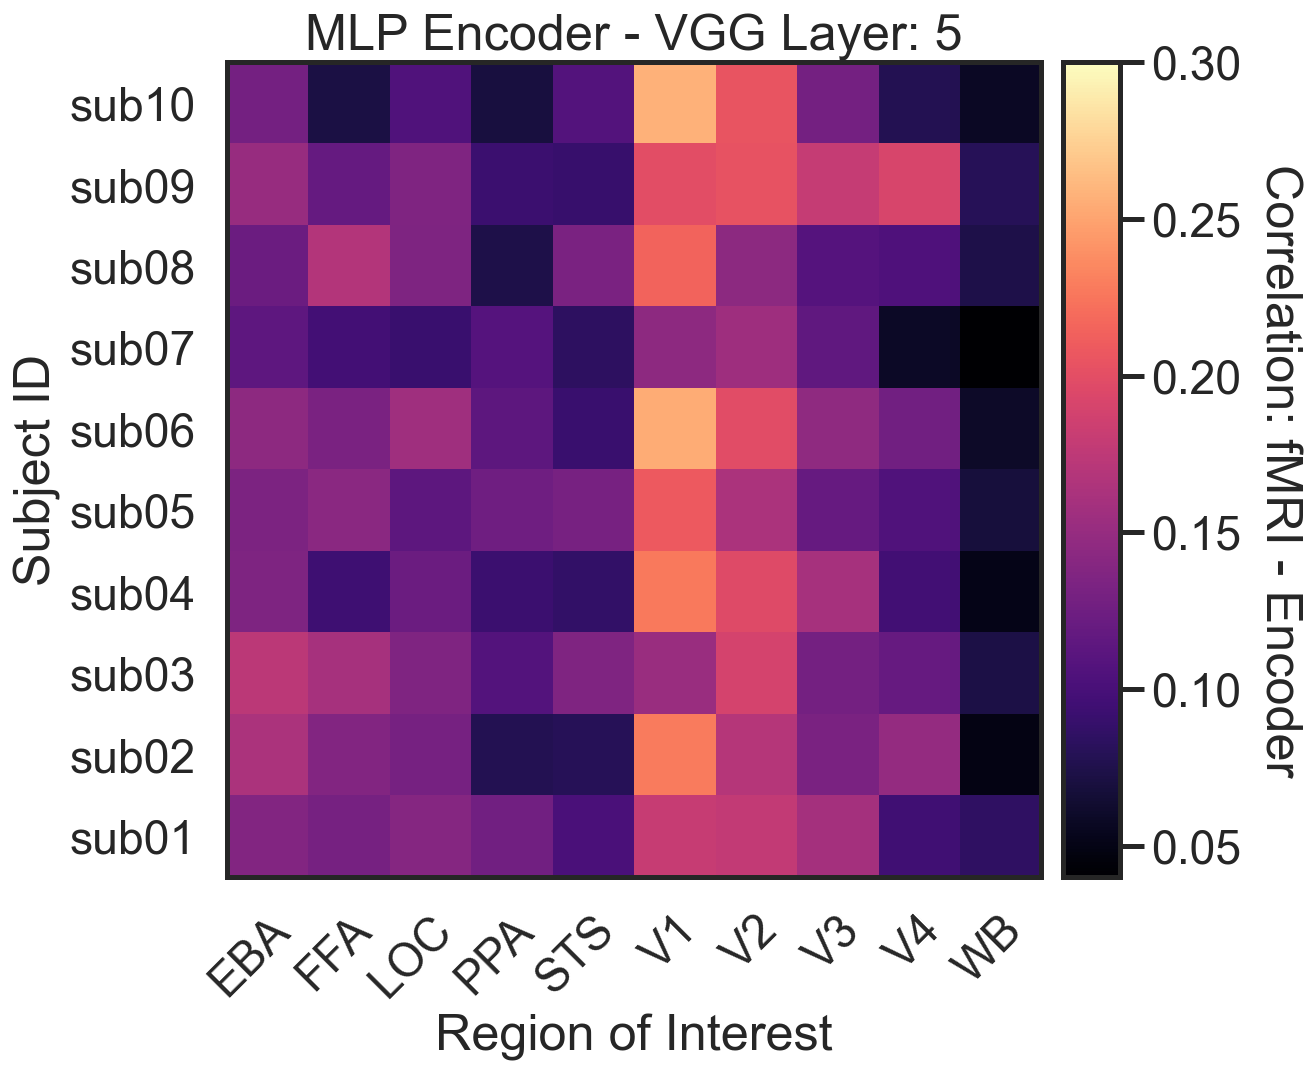

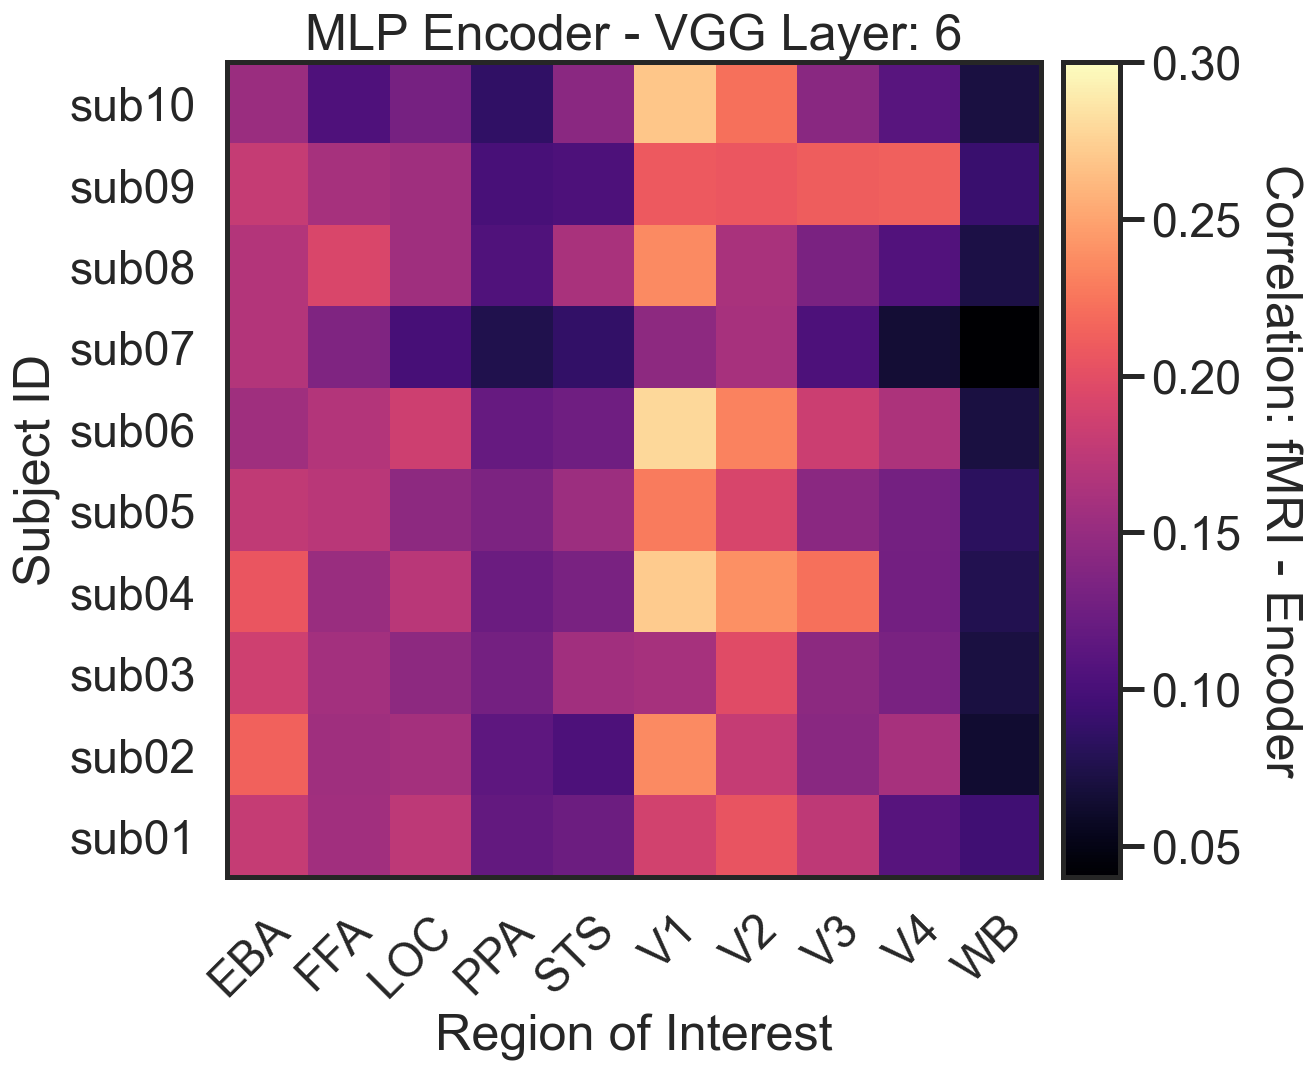

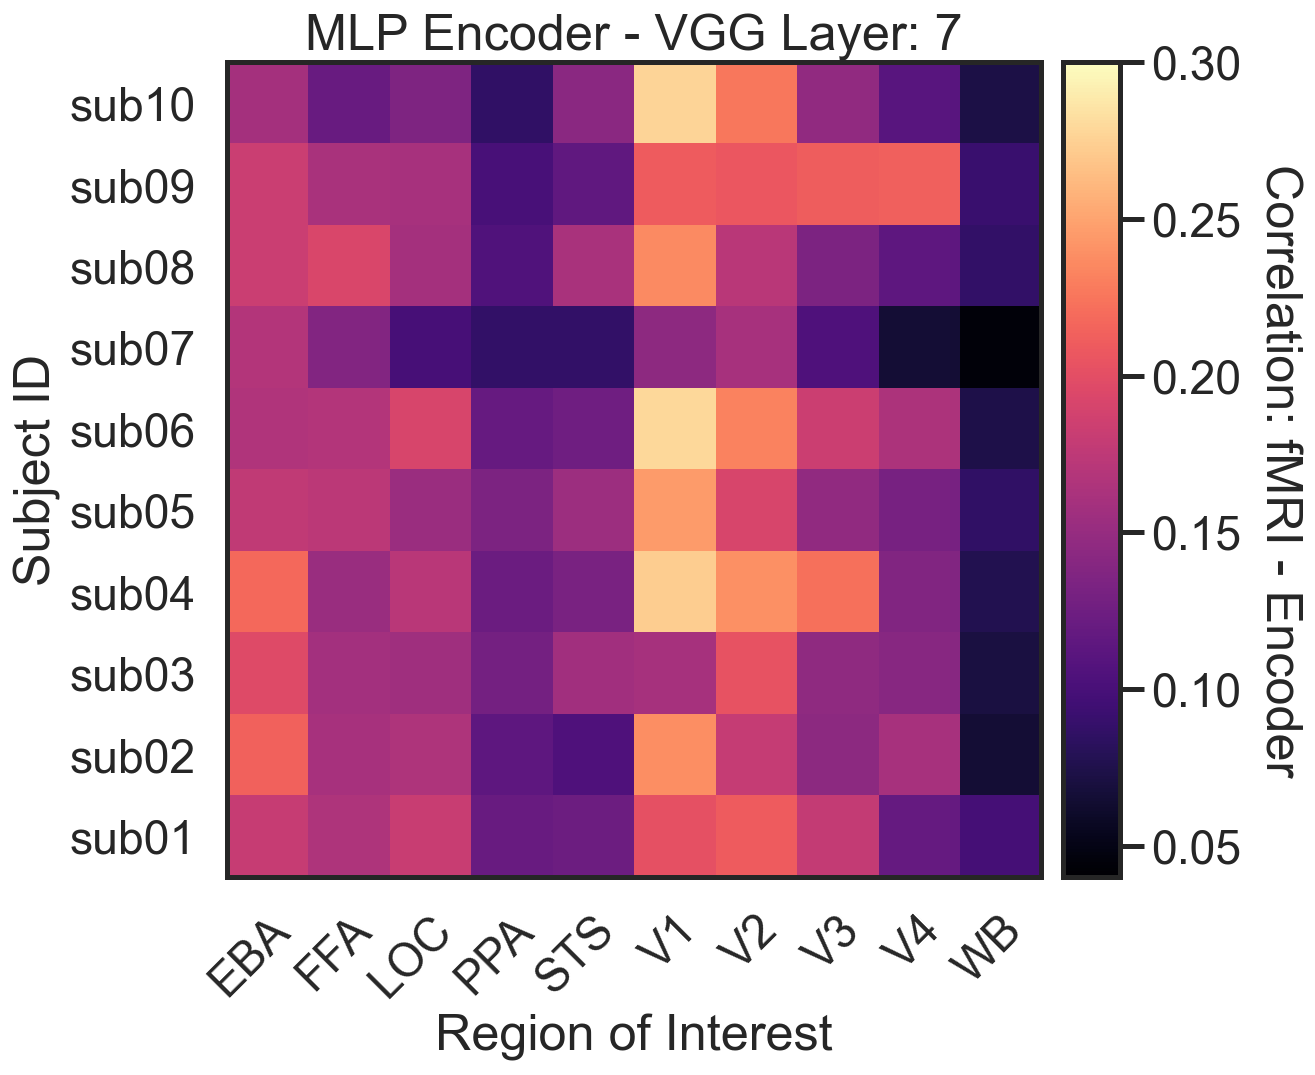

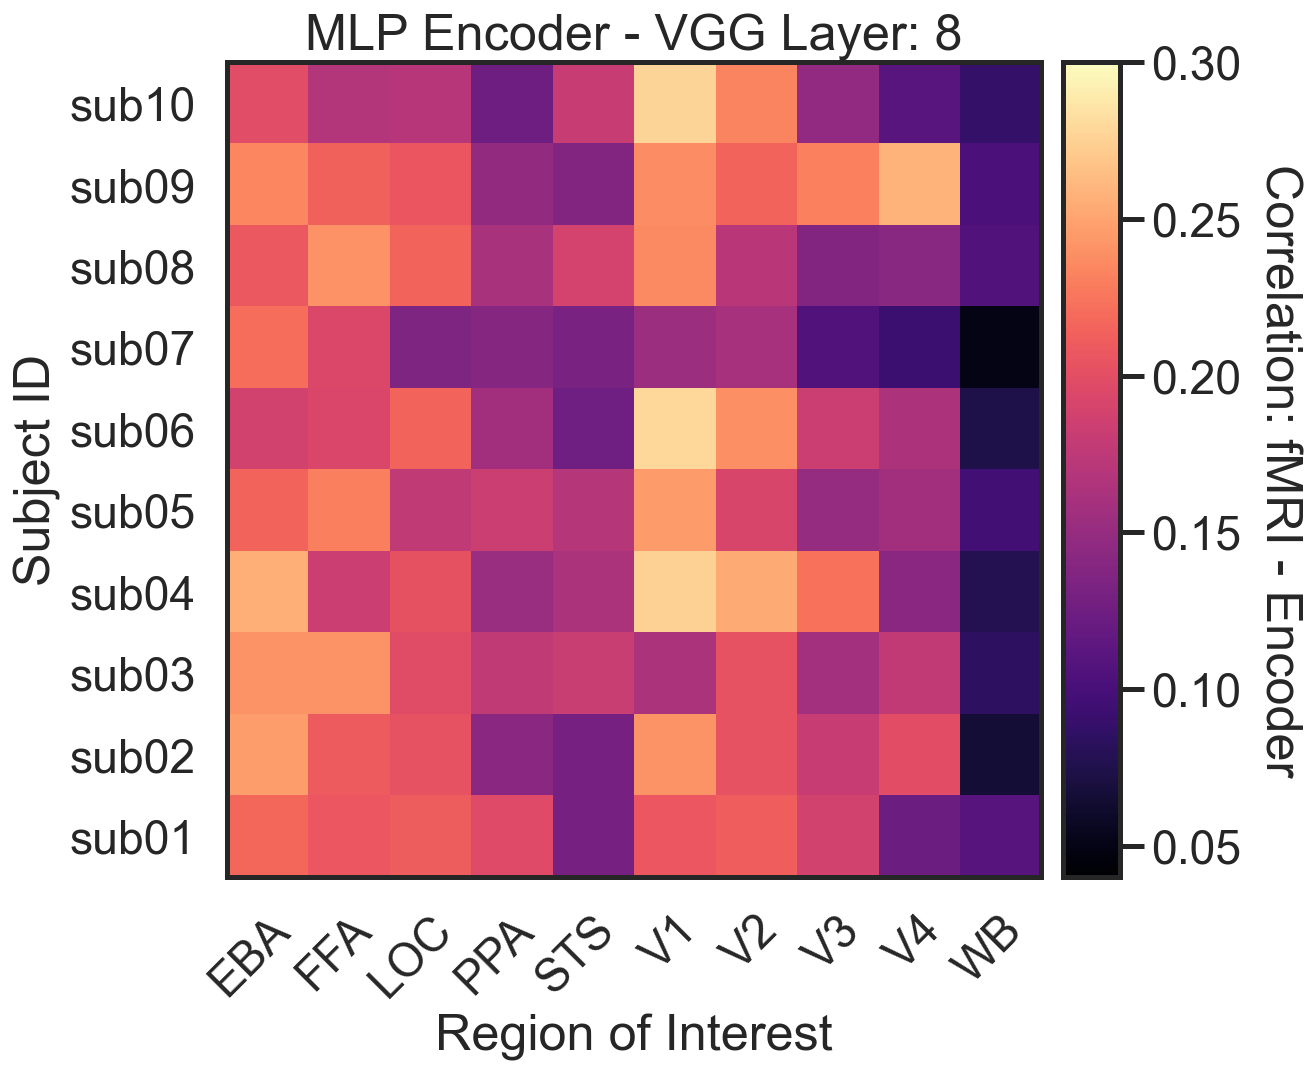

In [87]:
from mle_toolbox.visualize import visualize_2D_grid

for i, l_id in enumerate(["layer_1", "layer_2", "layer_3", "layer_4",
                          "layer_5", "layer_6", "layer_7", "layer_8"]):
    visualize_2D_grid(layer_df,
                      params_to_plot=["roi_type", "subject_id"],
                      target_to_plot="best_bo_score",
                      fixed_params={"layer_id": l_id},
                      plot_title=f"MLP Encoder - VGG Layer: {i+1}",
                      xy_labels=["Region of Interest", "Subject ID"],
                      variable_name="Correlation: fMRI - Encoder",
                      min_heat=0.04, max_heat=0.3)


# Bayesian Optimization Procedure Across Network Feature Layers

In [61]:
experiment_dir = "../experiments/mlp_alexnet_bo_20"
meta_log, hyper_log = load_result_logs(experiment_dir)

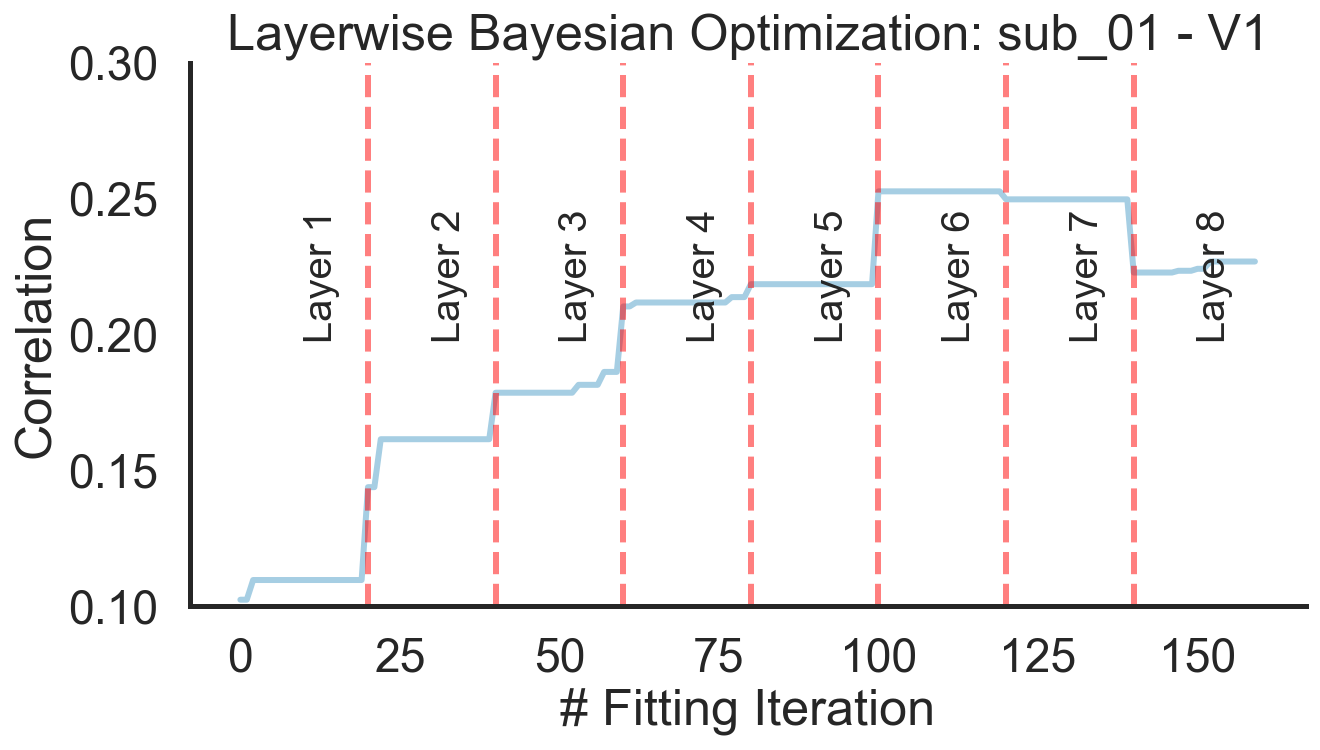

In [62]:
plot_bo_scores(meta_log, "b_1_eval_0", subject_id="sub_01", roi_type="V1", num_bo_per_layer=20)

# Performance Across Subjects and ROIs

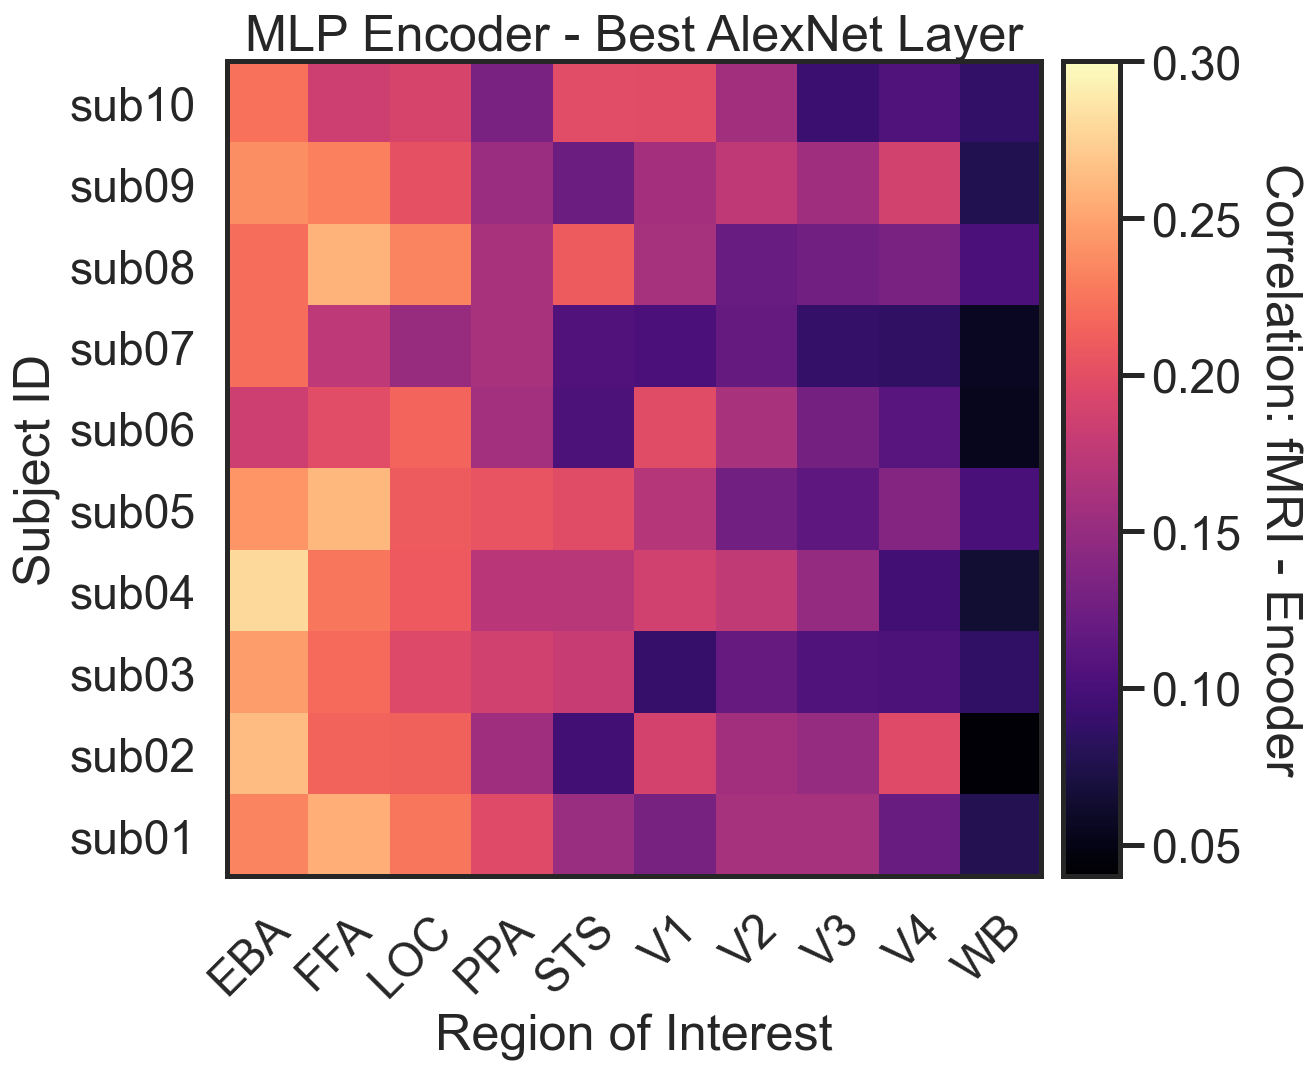

In [22]:
plot_roi_subject_grid(hyper_log, title="MLP Encoder - Best AlexNet Layer")

# Meaned Scores - Subject and ROI

[0.1581399  0.14765818 0.12733331 0.12792469 0.20487078 0.23539341
 0.22248714 0.15408887 0.16865384 0.07521167]


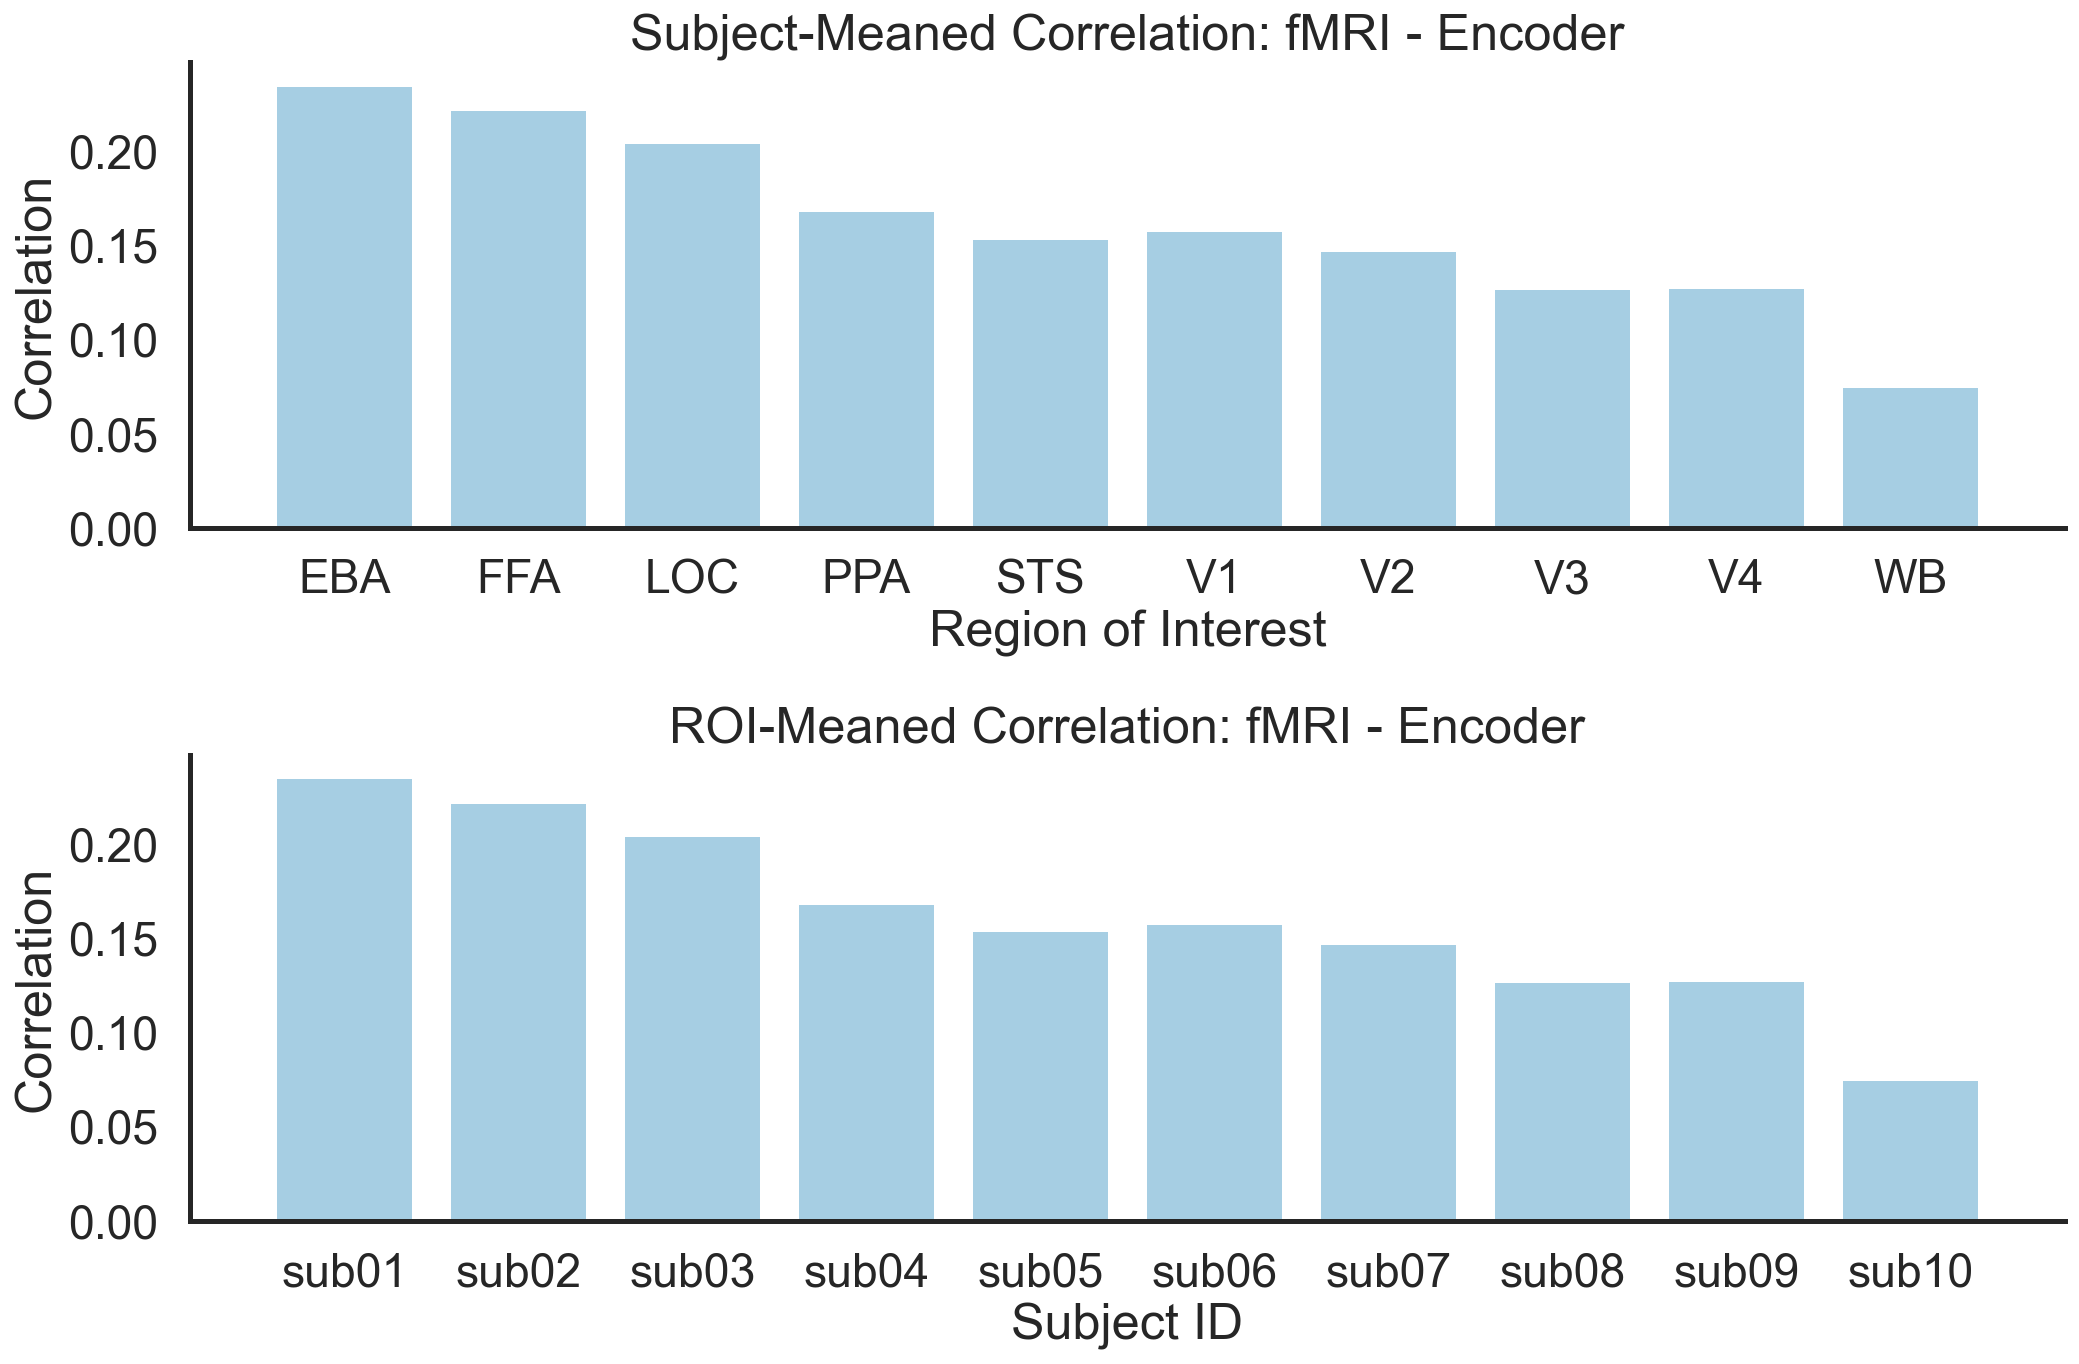

In [27]:
scores = plot_average_scores(hyper_log)
print(scores)